# Content Dimension: text
### Features
* BoW
* TF-IDF
* LDA

### Load data

In [1]:
import pandas as pd

df_train = pd.read_csv('data/2018/train-test/train.csv')
df_test = pd.read_csv('data/2018/train-test/test.csv')


### Preprocess

In [2]:
from utils import preprocess

In [3]:
df_train['preprocessed_text'] = [preprocess(t) for t in df_train['text']]

In [4]:
df_test['preprocessed_text'] = [preprocess(t) for t in df_test['text']]

# Binary Bag of Words

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features = None, ngram_range = (1,2), #(1,3) 
                             lowercase = False, token_pattern = r'[^\s]+',binary=True)

bow.fit(df_train['preprocessed_text'])   
X_train = bow.transform(df_train['preprocessed_text'])
X_test = bow.transform(df_test['preprocessed_text'])

y_train = df_train['misinformation']
y_test = df_test['misinformation']


X_train.shape

(6233, 130589)

logistic regression + binary bow
0.39
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       820
           1       0.80      0.79      0.80       739

    accuracy                           0.81      1559
   macro avg       0.81      0.81      0.81      1559
weighted avg       0.81      0.81      0.81      1559

AUC:  0.902742664774415


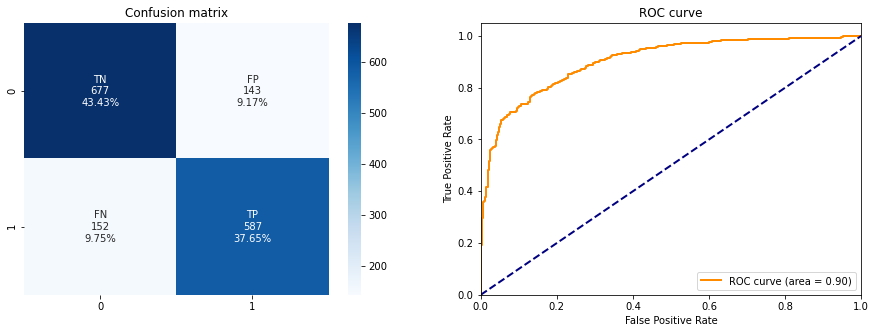

(0.8107761385503528,
 0.8041095890410959,
 0.8211036992116434,
 0.7943166441136671,
 0.8211036992116434,
 0.7991831177671885,
 0.8211036992116434,
 0.902742664774415)

In [6]:
from sklearn.linear_model import LogisticRegression
import utils

print('logistic regression + binary bow')
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_prob = lr.predict_proba(X_test)[:,1]
y_prob_train = lr.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

mlp + binary bow
0 
hidden layers: (150,); alpha: 0.00238; learning rate: 0.03748; batch: 100
AUC: 0.956
1 
hidden layers: (75, 125); alpha: 0.00002; learning rate: 0.00015; batch: 250
AUC: 0.962
2 
hidden layers: (50, 175, 200); alpha: 0.00013; learning rate: 0.00506; batch: 300
AUC: 0.963
3 
hidden layers: (350, 225); alpha: 0.00000; learning rate: 0.00011; batch: 200
AUC: 0.955
4 
hidden layers: (25, 75); alpha: 0.00008; learning rate: 0.02528; batch: 300
AUC: 0.963

--------------------
BEST PARAMETERS (validation AUC = 0.963)
hidden layers: (25, 75); alpha: 0.00008; learning rate: 0.02528; batch: 300
--------------------
0.71
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       820
           1       0.82      0.77      0.79       739

    accuracy                           0.81      1559
   macro avg       0.81      0.81      0.81      1559
weighted avg       0.81      0.81      0.81      1559

AUC:  0.893805076075118


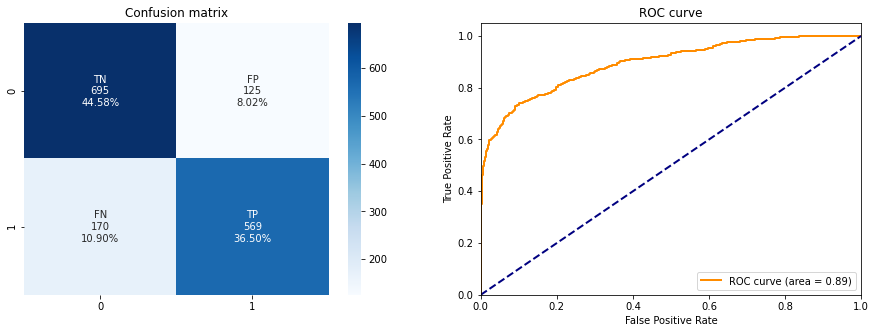

(0.8107761385503528,
 0.8198847262247838,
 0.8249258160237388,
 0.7699594046008119,
 0.8249258160237388,
 0.7941381716678296,
 0.8249258160237388,
 0.893805076075118)

In [7]:
from sklearn.neural_network import MLPClassifier

print('mlp + binary bow')
hl,bs,al,lri = utils.random_search_mlp(X_train,y_train,n_iter=5)
clf = utils.optimized_mlp(hl,bs,al,lri)
clf.fit(X_train, y_train)

y_prob = clf.predict_proba(X_test)[:,1]
y_prob_train = clf.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

# TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = None, ngram_range = (1,2), #(1,3) 
                             lowercase = False, token_pattern = r'[^\s]+',binary=True)

tfidf.fit(df_train['preprocessed_text'])   
X_train = tfidf.transform(df_train['preprocessed_text'])
X_test = tfidf.transform(df_test['preprocessed_text'])

logistic regression + tf-idf
0.48
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       820
           1       0.78      0.87      0.82       739

    accuracy                           0.82      1559
   macro avg       0.82      0.82      0.82      1559
weighted avg       0.83      0.82      0.82      1559

AUC:  0.9003382949932341


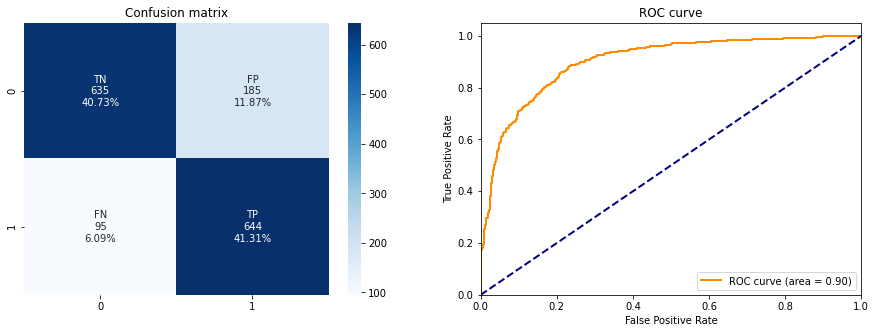

(0.8203976908274535,
 0.7768395657418576,
 0.8193548387096774,
 0.871447902571042,
 0.8193548387096774,
 0.8214285714285714,
 0.8193548387096774,
 0.9003382949932341)

In [9]:
print('logistic regression + tf-idf')
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_prob = lr.predict_proba(X_test)[:,1]
y_prob_train = lr.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

mlp + tf-idf
0 
hidden layers: (150,); alpha: 0.00238; learning rate: 0.03748; batch: 100
AUC: 0.957
1 
hidden layers: (75, 125); alpha: 0.00002; learning rate: 0.00015; batch: 250
AUC: 0.968
2 
hidden layers: (50, 175, 200); alpha: 0.00013; learning rate: 0.00506; batch: 300
AUC: 0.964
3 
hidden layers: (350, 225); alpha: 0.00000; learning rate: 0.00011; batch: 200
AUC: 0.959
4 
hidden layers: (25, 75); alpha: 0.00008; learning rate: 0.02528; batch: 300
AUC: 0.961

--------------------
BEST PARAMETERS (validation AUC = 0.968)
hidden layers: (75, 125); alpha: 0.00002; learning rate: 0.00015; batch: 250
--------------------
0.5
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       820
           1       0.82      0.74      0.78       739

    accuracy                           0.80      1559
   macro avg       0.81      0.80      0.80      1559
weighted avg       0.81      0.80      0.80      1559

AUC:  0.9019241559127364


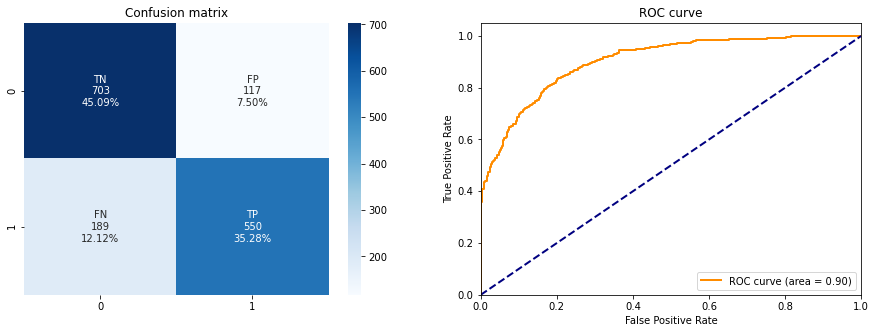

(0.8037203335471456,
 0.8245877061469266,
 0.8212616822429908,
 0.7442489851150202,
 0.8212616822429908,
 0.7823613086770981,
 0.8212616822429908,
 0.9019241559127364)

In [10]:
print('mlp + tf-idf')
hl,bs,al,lri = utils.random_search_mlp(X_train,y_train,n_iter=5)
clf = utils.optimized_mlp(hl,bs,al,lri)
clf.fit(X_train, y_train)

y_prob = clf.predict_proba(X_test)[:,1]
y_prob_train = clf.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

# Word embeddings - Word2Vec

### Create corpus

In [11]:
# df = pd.read_csv('data/2018/fakeWhatsApp.BR_2018.csv')
# corpus = list(df[df['midia']==0]['text'].unique())
# total_iter = len(corpus)
# divs = 10
# step = int(total_iter/divs)

# preprocessed_corpus = []

# for i, t in enumerate(corpus):
#     if i%step==0:
#         print(str((i/step)*divs)+'%')        
#     preprocessed_corpus.append(preprocess(t))      


In [12]:
import pickle
# with open('data/2018/preprocessed_corpus.p.pickle', 'wb') as handle:
#     pickle.dump(preprocessed_corpus, handle)

preprocessed_corpus = pickle.load( open( "data/2018/preprocessed_corpus.p.pickle", "rb" ) )

In [13]:
tokens_documents = [p.split() for p in preprocessed_corpus]

### Train word2vec

In [14]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec

class EpochLogger(CallbackAny2Vec):
    """Callback to log information about training"""

    def __init__(self):
        self.epoch = 0

    def on_epoch_begin(self, model):
        self.epoch += 1
        print("W2V: Epoch #{}".format(self.epoch))
        
epoch_logger = EpochLogger()

w2v = Word2Vec(sentences=tokens_documents, vector_size=100, epochs=15, window=5, min_count=1, workers=4, 
                 compute_loss=True, callbacks=[epoch_logger])
w2v.save("data/2018/word2vec.model")

C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


W2V: Epoch #1
W2V: Epoch #2
W2V: Epoch #3
W2V: Epoch #4
W2V: Epoch #5
W2V: Epoch #6
W2V: Epoch #7
W2V: Epoch #8
W2V: Epoch #9
W2V: Epoch #10
W2V: Epoch #11
W2V: Epoch #12
W2V: Epoch #13
W2V: Epoch #14
W2V: Epoch #15


### Load and test

In [15]:
w2v = Word2Vec.load("data/2018/word2vec.model")

In [16]:
w2v.wv.most_similar(positive=['facada'])

[('esfaquear', 0.6474012732505798),
 ('barriga', 0.6338896751403809),
 ('abdomem', 0.5501000881195068),
 ('purpurino', 0.5457021594047546),
 ('faca', 0.5390437245368958),
 ('cuspe', 0.520808219909668),
 ('ferimento', 0.510673463344574),
 ('abdomen', 0.5081184506416321),
 ('agressor', 0.5035485029220581),
 ('barrigada', 0.49549317359924316)]

In [17]:
w2v.wv['deus']

array([ 0.14474949,  0.6757354 ,  0.40152508, -1.3167351 , -2.7218268 ,
        0.01650473,  0.43936908,  5.0560427 ,  2.550051  ,  0.73338056,
        2.1791763 , -0.5741501 , -2.7884614 ,  1.735418  , -0.23906468,
        0.33071953, -2.9610937 , -2.321069  , -1.8142321 , -0.02877356,
       -2.0070288 , -2.7182667 , -0.61249524,  0.18916102, -0.7869506 ,
       -0.06829229, -3.013824  , -1.6106267 ,  0.604454  ,  0.71622026,
       -1.6054088 ,  1.3281772 ,  1.6253529 , -4.1748676 , -0.02164359,
       -1.1872663 ,  3.8920345 , -0.7414989 , -1.0481241 ,  0.8012423 ,
       -4.876667  ,  3.5301    , -0.7592468 ,  0.07319112,  0.8651388 ,
       -2.76933   ,  1.260453  ,  1.0072185 ,  1.7445264 ,  3.7627757 ,
        0.20838872, -1.4654554 , -1.8745375 ,  0.26468286, -1.8058034 ,
       -2.196967  ,  3.5220292 , -1.6964245 ,  2.8717122 ,  1.817956  ,
        0.0511415 ,  0.75652885,  0.7900699 , -0.6115794 ,  3.3179116 ,
        0.43864623,  2.3886728 ,  1.4514884 , -0.3998523 , -0.54

### Vectorize

In [18]:
import numpy as np

def vectorize_text(model, text, method='mean'):
        """
        Convert all words in a text to their embedding vector
        and calculate a vector for the text, by the mean or the sum of word vectors
        Parameters
        ----------
        text: str
        Text from wich the word vector's will be calculated    
        
        method: str
        'mean' or 'sum'
            
        Returns
        -------
        vec: numpy.ndarray 
        Array of the word embeddings from the given text 
        """
        n = model.wv.vector_size
        X = np.empty(shape=[0, n])
        words = text.split()
        for word in words:
            try:
                vec = model.wv[word]
                X = np.append(X,[vec], axis = 0)
            # if oov:    
            except:
                #print('word not in vocabulary: ', word)
                continue
        if X.size == 0:
            vec = np.zeros(n)
        elif method == 'mean':
            vec = np.mean(X,axis=0)
        elif method == 'sum':
            vec = np.sum(X,axis=0)
        return vec
    
def vectorize_corpus(model, corpus, method='mean'):
        """
        Convert all texts in a corpus to vectors
        Parameters
        ----------
        corpus: list
        List of texts    
        
        method: str
        'mean' or 'sum'
            
        Returns
        -------
        X: numpy.ndarray 
        2D Array of vectors from each text in corpus
        """
        X = [vectorize_text(model, text, method=method) for text in corpus]
        X = np.concatenate(X, axis=0).reshape(len(X),len(X[0]))
        return X

x = vectorize_corpus(w2v, ['fora bolsonaro genocida'])
x

array([[-0.30477879,  0.17349182,  0.30907389, -0.97832866,  0.34867324,
         0.42835712, -1.01068587,  0.5941332 , -0.14866614, -0.48930927,
         0.05973113,  0.3390819 , -0.24536154,  0.14937809,  0.37230179,
        -0.84306341,  0.04607932, -0.14087926,  0.44744299, -0.10275543,
        -0.9560979 , -0.74741933, -0.58797702, -0.28468477,  0.09594592,
        -0.22826193,  0.31736669,  0.54508486,  0.60042454,  0.43208115,
        -0.0387512 , -0.46569321, -0.6986294 , -0.21338455,  0.4363083 ,
         1.07812689,  0.48723753,  0.8339744 ,  0.47317682,  0.4499858 ,
        -0.53998107,  0.09876441, -0.38202679,  0.79987223, -0.27916803,
        -0.14278366,  0.21485406,  0.88416936,  0.02565399, -0.20052353,
         0.14206664,  0.4292235 , -0.21302087, -0.27389193,  0.22525034,
        -0.39387517,  0.16786077,  0.21884459,  0.58676275, -0.43575088,
         0.46787556, -0.0409426 ,  0.72462353,  0.19813491, -0.0458091 ,
         0.73578248,  0.89152666, -0.37653879,  0.0

In [19]:
X_train = vectorize_corpus(w2v, df_train['preprocessed_text'])
X_test = vectorize_corpus(w2v, df_test['preprocessed_text'])

### Classification

logistic regression + w2v
0.46
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       820
           1       0.68      0.77      0.72       739

    accuracy                           0.72      1559
   macro avg       0.72      0.72      0.72      1559
weighted avg       0.73      0.72      0.72      1559

AUC:  0.8037905541437012


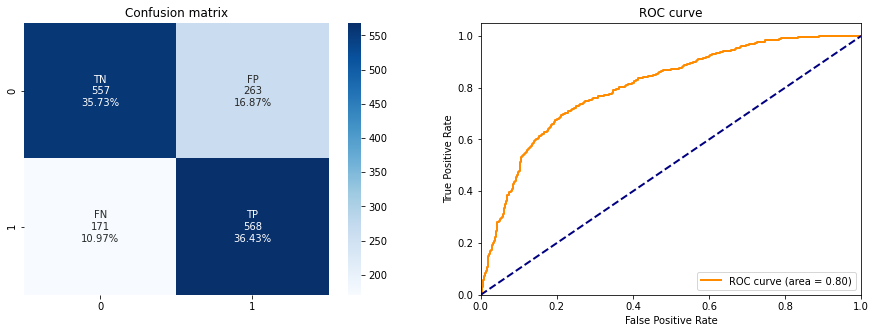

In [20]:
print('logistic regression + w2v')
lrw2v = LogisticRegression()
lrw2v.fit(X_train, y_train)
y_prob = lrw2v.predict_proba(X_test)[:,1]
y_prob_train = lrw2v.predict_proba(X_train)[:,1]
thr = utils.optimal_threshold(y_prob_train,y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
test_metrics = utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

mlp + w2v
0 
hidden layers: (150,); alpha: 0.00238; learning rate: 0.03748; batch: 100
AUC: 0.906
1 
hidden layers: (75, 125); alpha: 0.00002; learning rate: 0.00015; batch: 250
AUC: 0.825
2 
hidden layers: (50, 175, 200); alpha: 0.00013; learning rate: 0.00506; batch: 300
AUC: 0.897
3 
hidden layers: (350, 225); alpha: 0.00000; learning rate: 0.00011; batch: 200
AUC: 0.909
4 
hidden layers: (25, 75); alpha: 0.00008; learning rate: 0.02528; batch: 300
AUC: 0.898
5 
hidden layers: (200, 25, 50); alpha: 0.00000; learning rate: 0.06823; batch: 150
AUC: 0.865
6 
hidden layers: (200,); alpha: 0.00001; learning rate: 0.02102; batch: 250
AUC: 0.914
7 
hidden layers: (25, 25, 125); alpha: 0.00030; learning rate: 0.00686; batch: 250
AUC: 0.897
8 
hidden layers: (125, 250); alpha: 0.00006; learning rate: 0.00691; batch: 100
AUC: 0.897
9 
hidden layers: (200, 250); alpha: 0.00757; learning rate: 0.00911; batch: 200
AUC: 0.910

--------------------
BEST PARAMETERS (validation AUC = 0.914)
hidden l

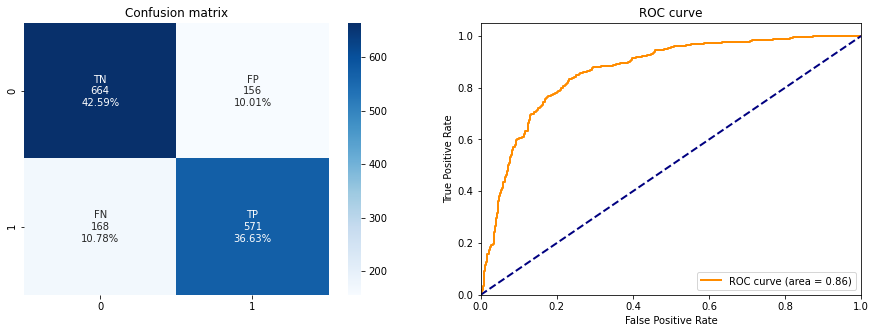

(0.7921744708146248,
 0.7854195323246217,
 0.8038740920096854,
 0.7726657645466847,
 0.8038740920096854,
 0.7789904502046384,
 0.8038740920096854,
 0.8632479619789433)

In [21]:
print('mlp + w2v')
hl,bs,al,lri = utils.random_search_mlp(X_train,y_train,n_iter=10)
clf = utils.optimized_mlp(hl,bs,al,lri)
clf.fit(X_train, y_train)

y_prob = clf.predict_proba(X_test)[:,1]
y_prob_train = clf.predict_proba(X_train)[:,1]
# threshold moving

thr = utils.optimal_threshold(y_prob_train, y_train)
print(thr)
y_pred = [1 if p >= thr else 0 for p in y_prob]
utils.get_test_metrics(y_test, y_pred, y_prob, full_metrics = True)

# Topic modelling - LDA